In [107]:
from IPython.core.display import HTML
HTML('''
<script>
var logoParent = document.getElementById("kernel_logo_widget")
var logo = document.getElementById("kernel_logo_widget").getElementsByClassName("current_kernel_logo")[0];
logo.src = "https://i.ibb.co/mD4jTGQ/itclogo.jpg";
logo.style = "display: inline; width:138px; height:40px";
logoParent.innerHTML = '<a href="https://i.ibb.co/mD4jTGQ/itclogo.jpg">' + logoParent.innerHTML + '</a>';
</script>
''')

<font size="36"><b>Pandas - Multi-Index and Aggregation Assignment</b></font> <img src = "https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/03/pandas.jpg" height=200 width=200>

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
import scipy.stats as ss

warnings.filterwarnings("ignore", category=RuntimeWarning, module="matplotlib")
%matplotlib inline

For this assignement, we will work with the [tips dataset](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv). 

In [109]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [110]:
df.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

# Assignment

Answer the following questions:

<div class="alert alert-info"><b>Note:</b> Try to answer the questions with one line of code, using the '.' pipe operator, when possible unless it causes recalculations of the same thing</div>

### Q1
Calculate the average % of tips out of the total bill that Females leave, vs. Men. Present the data in one DataFrame

In [111]:
#create the new column 
df['pct_tip'] = (df['tip']/df['total_bill']*100)
print('\nThe average % of tips out of the total bill that Females leave vs. Men:')
#count the avg group by sex
avg_dol = df.groupby('sex')['pct_tip'].aggregate([np.mean])
avg_dol



The average % of tips out of the total bill that Females leave vs. Men:


,mean
sex,
Female,16.649074
Male,15.765055


### Q2
Calculate the average % of tips out of the total bill that Smoker Females leave, vs. Smoker Men, vs. non-smoking Men and non-smoking Females. 
- Have `sex` as the first index, and `smoker` as the second index. 
- Present the data in one DataFrame

In [112]:
avg_smoke = df.groupby(['sex', 'smoker'])['pct_tip'].aggregate([np.mean]).unstack()
print('The average % of tips out of the total bill that \nSmoker Females leave, vs. Smoker Men, vs. non-smoking Men and non-smoking Females')
avg_smoke

The average % of tips out of the total bill that 
Smoker Females leave, vs. Smoker Men, vs. non-smoking Men and non-smoking Females


mean           
smoker         No        Yes
sex                         
Female  15.692097  18.215035
Male    16.066872  15.277118

### Q3
Find the day and the time in which the most total tip is paid

In [113]:
print('The day and the time in which the most total tip is paid:')
display(df.loc[df['tip'] == df['tip'].max(),['day','time']])



The day and the time in which the most total tip is paid:


,day,time
170,Sat,Dinner


### Q4
Calculate % of top 5 bills from total `total_bill` per each `time` and `day`: 
- Display in a DataFrame how many bills there were per each `time` and `day`
- Create an aggregative function that finds 5 highest values in a series, and returns their sum's % out of the entire series. 
- Create an aggregative function that finds 5 lowest values in a series, and returns their sum's % out of the entire series.
- Use it on the data with the `agg` operator, to find the top and bottom 5 bills average, out of the total bills in each time and day.
- Return a DataFrame with the answers.

In [151]:
# Display in a DataFrame how many bills there were per each time and day
# print('In a DataFrame there are {} items per each time and day'.format(df[['day','time','total_bill']].count()[0]))
display(df[['day','time','total_bill']])

# Create an aggregative function that finds 5 highest values in a series, and returns their 
# sum's % out of the entire series.
def top_five_pct(series_group1):
    
    return (series_group1.notna().nlargest(n=5,keep='first').sum()/series_group1.notna().sum())*100


#Create an aggregative function that finds 5 lowest values in a series, 
# and returns their sum's % out of the entire series.
def low_five_pct(series_group):
    return(series_group.nsmallest(n=5,keep='first').sum()/series_group.sum())*100

# Use it on the data with the agg operator, to find the top and bottom 5 bills average, 
# out of the total bills in each time and day.
# Return a DataFrame with the answers.
display(df.groupby(['day',"time"])['total_bill'].aggregate([top_five_pct, low_five_pct, np.mean]))




,day,time,total_bill
0,Sun,Dinner,16.99
1,Sun,Dinner,10.34
2,Sun,Dinner,21.01
3,Sun,Dinner,23.68
4,Sun,Dinner,24.59
...,...,...,...
239,Sat,Dinner,29.03
240,Sat,Dinner,27.18
241,Sat,Dinner,22.67
242,Sat,Dinner,17.82


/home/gal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in long_scalars
  if __name__ == '__main__':
/home/gal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


top_five_pct  low_five_pct       mean
day  time                                         
Fri  Dinner     41.666667     24.143923  19.663333
     Lunch      71.428571     64.134786  12.845714
Sat  Dinner      5.747126      2.118758  20.441379
Sun  Dinner      6.578947      2.780304  21.410000
Thur Dinner    100.000000    100.000000  18.780000
     Lunch       8.196721      3.753886  17.664754

### Q5
Calculate the sum of bills per group: non-smoking Men, non-smoking Females, smoking Females and smoking Men. 

Code it so you get a data frame with the columns "Female" and "Male", below a larger column "total_bill" (hierarchical index)

In [115]:
df.groupby(['smoker',"sex"])['total_bill'].aggregate(sum).to_frame().unstack()

total_bill         
sex        Female     Male
smoker                    
No         977.68  1919.75
Yes        593.27  1337.07

### Q6
Add another index "day" to Q5 as the first index, do that we can see the conclusion per day per smokers group per gender

In [116]:
df.groupby(['day','smoker','sex'])['total_bill'].aggregate([sum]).unstack()

sum        
sex          Female    Male
day  smoker                
Fri  No       38.73   34.95
     Yes      88.58  163.62
Sat  No      247.05  637.73
     Yes     304.00  589.62
Sun  No      291.54  877.34
     Yes      66.16  392.12
Thur No      400.36  369.73
     Yes     134.53  191.71

### Q7
Now in addition to `sum` from Q6, answer the same question with aggregation of `mean`, `std`, and `sum`.  Have a similar output structure as in Q6, but with higher column level of `mean`, `std`, `sum`

In [117]:
stat_totall_bill = df.groupby(['day','smoker','sex'])['total_bill'].aggregate([np.sum,np.mean,np.std])
stat_totall_bill

sum       mean        std
day  smoker sex                                 
Fri  No     Female   38.73  19.365000   4.787113
            Male     34.95  17.475000   7.092281
     Yes    Female   88.58  12.654286   3.883138
            Male    163.62  20.452500  10.943815
Sat  No     Female  247.05  19.003846   6.730219
            Male    637.73  19.929063   9.779061
     Yes    Female  304.00  20.266667  10.485703
            Male    589.62  21.837778   9.988045
Sun  No     Female  291.54  20.824286   8.396159
            Male    877.34  20.403256   8.140559
     Yes    Female   66.16  16.540000   4.854764
            Male    392.12  26.141333  10.693824
Thur No     Female  400.36  16.014400   6.783939
            Male    369.73  18.486500   8.739134
     Yes    Female  134.53  19.218571  10.847137
            Male    191.71  19.171000   6.757421

### Q8
Create a series of plots that present your findings from Q7. Make your plots informative. Make sure that all of the conclusions from the dataframe can be seen in the series of graphs.

In [118]:
# getting data by index for pie
thursday = stat_totall_bill.iloc[stat_totall_bill.index.get_level_values('day') == 'Thur']
friday = stat_totall_bill.iloc[stat_totall_bill.index.get_level_values('day') == 'Fri']
saturday = stat_totall_bill.iloc[stat_totall_bill.index.get_level_values('day') == 'Sat']
sunday = stat_totall_bill.iloc[stat_totall_bill.index.get_level_values('day') == 'Sun']


female = stat_totall_bill.iloc[stat_totall_bill.index.get_level_values('sex') == 'Female']
male = stat_totall_bill.iloc[stat_totall_bill.index.get_level_values('sex') == 'Male']

smoke = stat_totall_bill.iloc[stat_totall_bill.index.get_level_values('smoker') == 'Yes']
osmoke = stat_totall_bill.iloc[stat_totall_bill.index.get_level_values('smoker') == 'No']

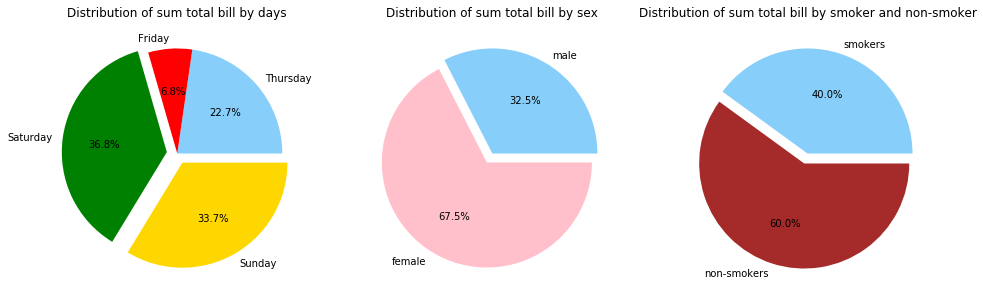

In [119]:
%matplotlib inline

fig, axs = plt.subplots(1,3, figsize=(16, 30))
ax1, ax2, ax3 = fig.axes

days=['Thursday', 'Friday', 'Saturday', 'Sunday']
sex = ['male', 'female']
health = ['smokers', 'non-smokers']

colors1 = ['lightskyblue', 'red',  'green', 'gold']
colors2 = ['lightskyblue', 'pink']
colors3 = ['lightskyblue', 'brown']

explode1 = (0, 0, 0.1, 0.1)
explode2 = (0, 0.1)

ax1.pie([thursday['sum'].sum(), friday['sum'].sum(), saturday['sum'].sum(), sunday['sum'].sum()], labels=days,colors= colors1, explode=explode1, autopct='%1.1f%%')
ax1.set_title("Distribution of sum total bill by days")

ax2.pie([female['sum'].sum(), male['sum'].sum()], autopct='%1.1f%%', labels=sex,colors=colors2, explode=explode2)
ax2.set_title("Distribution of sum total bill by sex")

ax3.pie([smoke['sum'].sum(), nosmoke['sum'].sum()], autopct='%1.1f%%', labels=health, colors=colors3, explode=explode2)
ax3.set_title("Distribution of sum total bill by smoker and non-smoker")

plt.show()

Text(0, 0.5, 'Sum of total bill a day')

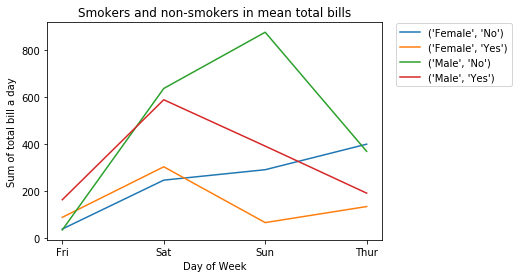

In [149]:
f, ax = plt.subplots()
groups = stat_totall_bill.groupby(["sex", "smoker"])

for name, group in groups:
    group = group.reset_index()
    ax.plot(group.day, group['sum'], label = name)
plt.title('Smokers and non-smokers in total bills')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0.1)
plt.xlabel('Day of Week')
plt.ylabel('Sum of total bill a day')


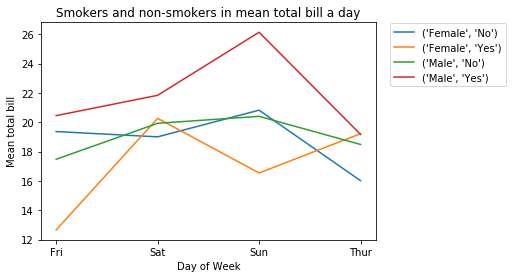

In [150]:
f, ax = plt.subplots()
groups = stat_totall_bill.groupby(["sex", "smoker"])

for name, group in groups:
    group = group.reset_index()
    ax.plot(group.day, group['mean'], label = name )
plt.title('Smokers and non-smokers in mean total bill a day')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0.1)
plt.xlabel('Day of Week')
plt.ylabel('Mean total bill')

plt.show()